In [14]:
import pandas as pd
import matplotlib.pyplot as plt

url = "C:/Users/Юлай/Desktop/Practices/2-ой_курс/3-й_семестр/ЦифроваяКафедра/AI-Iskander/homeworks/HW02/S02-hw-dataset.csv"
df = pd.read_csv(url, sep = ",")


df.head()
df.info()
df.describe()


miss_df = df.isna().mean() #Доли пропусков
print(miss_df)


dupls = df.duplicated().sum()
print("Дубликаты: ", dupls)


susp_age = 0
for i, age in enumerate(df['age']):
    if (age < 0 or age > 100):
        susp_age+=1
print("Кол-во аномалий в возрасте: ", susp_age)


susp_r_p = 0
for i in range (len(df)):
    purch = df.loc[i, 'purchases']
    reven = df.loc[i, 'revenue']
    if (purch == 0 and reven > 0) or (purch > 0 and reven == 0):
        susp_r_p += 1
print("Логические ошибки: ", susp_r_p)

print("В результате была обнаружена одна повторная строка, одна аномалия в возрасте и одна логическая ошибка в покупках и доходе")


cnt_country = df["country"].value_counts()
print("Частоты стран: ", cnt_country)


group = df.groupby('country').agg({
    'purchases': ['mean', 'sum'],
    'revenue': ['mean', 'sum']})
print("Группировка по страннам: ", group)

print("Страной с наибольшим кол-ом пользователей является Россия, а за ней Франция. Германия показала наивысшие средние показатели по покупкам и доходам, США показывает самый низкий доход по сравнению с остальными странами")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64
Дубликаты:  1
Кол-во аномалий в возрасте:  1
Логические ошибки:  1
В результате была обнаружена одна повторная строка, одна аномалия в возрасте и одна логическая ошибка в покупках и доходе
Частоты стран:  country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
Группировка по страннам:          purchases          revenue       
             mean sum         mean    sum
country                                  


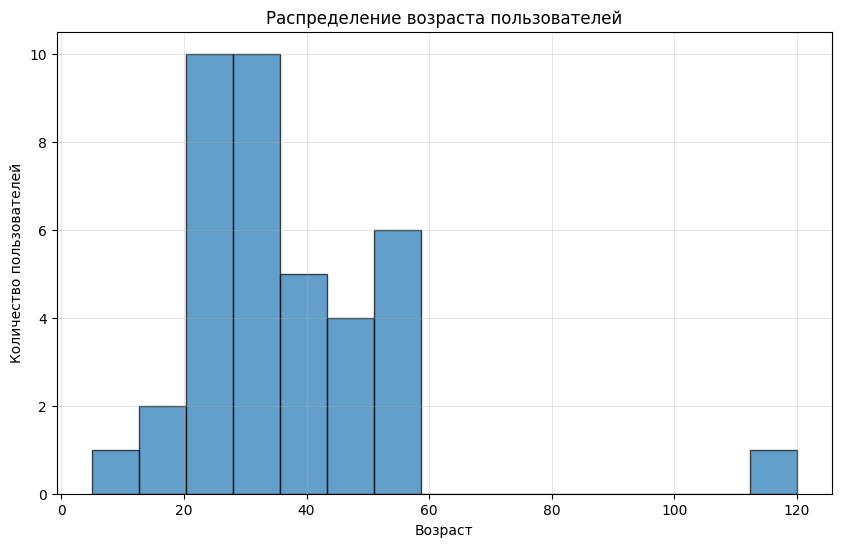

Гистограмма: Показано распределение возраста пользователей. Большинство пользователей в возрасте 20-40 лет.


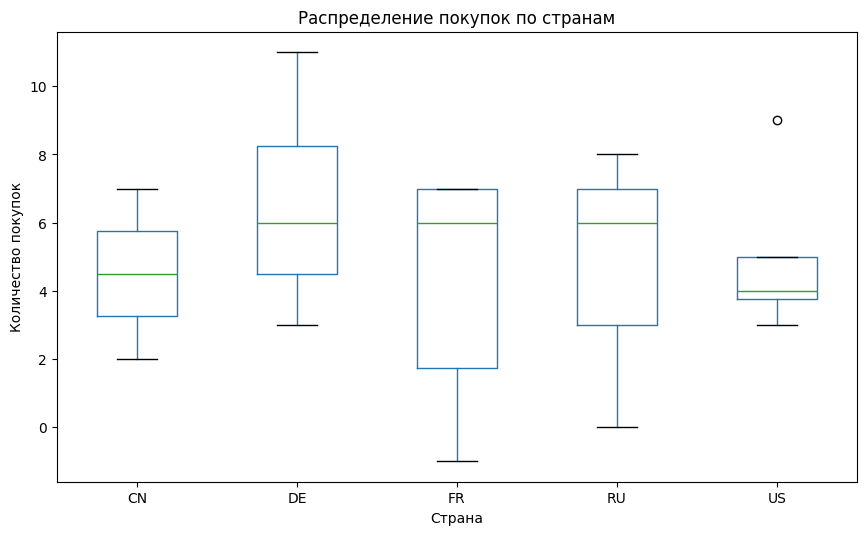

Боксплот: Показано распределение покупок по странам. Германия имеет самый высокий медианный уровень покупок.


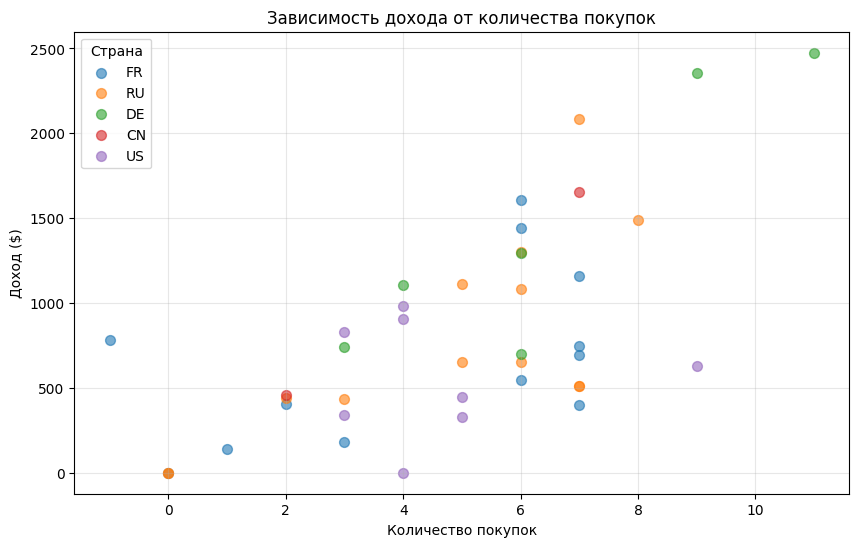

Scatter plot: Показана зависимость дохода от количества покупок. Наблюдается положительная корреляция между количеством покупок и доходом.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

url = "C:/Users/Юлай/Desktop/Practices/2-ой_курс/3-й_семестр/ЦифроваяКафедра/AI-Iskander/homeworks/HW02/S02-hw-dataset.csv"
df = pd.read_csv(url, sep = ",")

figures_dir = "figures"

#Гистограмма 
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(df['age'].dropna(), bins=15, edgecolor='black', alpha=0.7)
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество пользователей')
ax.set_title('Распределение возраста пользователей')
ax.grid(True, alpha=0.3)
plt.savefig(f'{figures_dir}/histogram_age.png')
plt.show()
print("Показано распределение возраста пользователей. Большинство пользователей в возрасте 20-40 лет.")

# Боксплот 
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='purchases', by='country', ax=ax, grid=False)
ax.set_xlabel('Страна')
ax.set_ylabel('Количество покупок')
ax.set_title('Распределение покупок по странам')
plt.suptitle('')
plt.savefig(f'{figures_dir}/boxplot_purchases_by_country.png')
plt.show()
print("Показано распределение покупок по странам. Германия имеет самый высокий медианный уровень покупок.")

# Scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
colors = {'RU': 'red', 'FR': 'blue', 'US': 'green', 'DE': 'orange', 'CN': 'purple'}

for country in df['country'].unique():
    country_data = df[df['country'] == country]
    ax.scatter(country_data['purchases'], country_data['revenue'], 
               label=country, alpha=0.6, s=50)

ax.set_xlabel('Количество покупок')
ax.set_ylabel('Доход ($)')
ax.set_title('Зависимость дохода от количества покупок')
ax.legend(title='Страна')
ax.grid(True, alpha=0.3)
plt.savefig(f'{figures_dir}/scatter_purchases_vs_revenue.png')
plt.show()
print("Показана зависимость дохода от количества покупок. Наблюдается положительная корреляция между количеством покупок и доходом.")